
# Clasificación Binaria de Mensajes Sexistas

Este notebook implementa un modelo de clasificación binaria utilizando algoritmos clásicos de aprendizaje supervisado, específicamente **SVM** (Support Vector Machine). El objetivo es predecir si un mensaje es **sexista** o **no sexista**.


In [19]:

# Importar librerías necesarias
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [20]:

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fernandoleonfranco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernandoleonfranco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:

# Configuración del directorio donde están los datos
# Cambia esta ruta a donde tengas los archivos `train.tsv` y `test.tsv`
os.chdir(r'/Users/fernandoleonfranco/Documents/GitHub/Semestre_III/DataIntelligence/exist2021')

# Cargar los datos
df_train = pd.read_csv("train.tsv", sep='\t')
df_test = pd.read_csv("test.tsv", sep='\t')

print('Tamaño training:', df_train.shape)
print('Tamaño test:', df_test.shape)


Tamaño training: (6977, 7)
Tamaño test: (4368, 7)


In [22]:

# Filtrar por idioma inglés
df_train = df_train[df_train['language'] == 'en']
df_test = df_test[df_test['language'] == 'en']
print('Tamaño training (solo inglés):', df_train.shape)
print('Tamaño test (solo inglés):', df_test.shape)


Tamaño training (solo inglés): (3436, 7)
Tamaño test (solo inglés): (2208, 7)


In [23]:

# Preparar las columnas necesarias
df_train = df_train.drop(['test_case', 'id', 'source', 'task2'], axis=1)
df_test = df_test.drop(['test_case', 'id', 'source', 'task2'], axis=1)
df_train = df_train.rename(columns={'task1': 'label'})
df_test = df_test.rename(columns={'task1': 'label'})
print('Primeros registros del training:')
print(df_train.head())


Primeros registros del training:
  language                                               text       label
0       en  She calls herself "anti-feminazi" how about sh...      sexist
1       en  Now, back to these women, the brave and the be...  non-sexist
2       en  @CurvyBandida @Xalynne_B Wow, your skirt is ve...      sexist
3       en  @AurelieGuiboud Incredible!  Beautiful!But I l...  non-sexist
4       en  i find it extremely hard to believe that kelly...  non-sexist


In [24]:

# Preprocesamiento de texto
stopwords_en = stopwords.words("english")

def clean_text(text):
    text = str(text).lower()  # Minúsculas
    from nltk.tokenize.punkt import PunktSentenceTokenizer
    punkt_tokenizer = PunktSentenceTokenizer()  # Instanciar el tokenizador
    
    tokens = punkt_tokenizer.tokenize(text)  # Tokenizar
    tokens = [word for word in tokens if word not in stopwords_en]  # Eliminar stopwords
    tokens = [PorterStemmer().stem(word) for word in tokens]  # Stemming
    min_length = 3
    p = re.compile('^[a-zA-Z]+$')
    filtered_tokens = [token for token in tokens if len(token) >= min_length and p.match(token)]
    return filtered_tokens


In [25]:

# Codificación de etiquetas
y_train = df_train['label'].tolist()
y_test = df_test['label'].tolist()

le = LabelEncoder()
print('Etiquetas originales:', y_train[:10])
y_train = le.fit_transform(y_train)
LABELS = le.classes_
print('Etiquetas:', LABELS)
print('Numero de etiquetas:', len(LABELS))
print('Después de codificación:', y_train[:10])

print('Etiquetas originales:', y_test[:10])
y_test = le.transform(y_test)
print('Después de codificación:', y_test[:10])



Etiquetas originales: ['sexist', 'non-sexist', 'sexist', 'non-sexist', 'non-sexist', 'sexist', 'non-sexist', 'non-sexist', 'non-sexist', 'non-sexist']
Etiquetas: ['non-sexist' 'sexist']
Numero de etiquetas: 2
Después de codificación: [1 0 1 0 0 1 0 0 0 0]
Etiquetas originales: ['non-sexist', 'non-sexist', 'sexist', 'sexist', 'non-sexist', 'non-sexist', 'non-sexist', 'sexist', 'sexist', 'non-sexist']
Después de codificación: [0 0 1 1 0 0 0 1 1 0]


In [26]:

# Crear el pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tf', TfidfTransformer()),
    ('svm', SVC()),
])

# Entrenar el modelo
X_train = df_train['text'].tolist()
pipeline.fit(X_train, y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x15f0ef9c0>)),
                ('tf', TfidfTransformer()), ('svm', SVC())])

              precision    recall  f1-score   support

  non-sexist       0.48      1.00      0.64      1050
      sexist       0.00      0.00      0.00      1158

    accuracy                           0.48      2208
   macro avg       0.24      0.50      0.32      2208
weighted avg       0.23      0.48      0.31      2208

Matriz de confusión:
[[1050    0]
 [1158    0]]


/opt/miniconda3/envs/semestre_tres/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/semestre_tres/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/semestre_tres/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

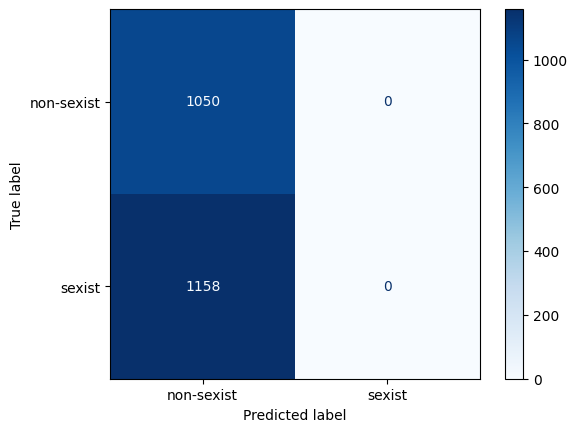

In [27]:

# Evaluar el modelo
X_test = df_test['text'].tolist()
predictions = pipeline.predict(X_test)

# Métricas de evaluación
print(classification_report(y_test, predictions, target_names=LABELS))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print('Matriz de confusión:')
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=LABELS)
disp.plot(cmap=plt.cm.Blues)
plt.show()
